In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Load data
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))

In [3]:
train_df.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,target
0,7000.0,0.1894,256.38,MORTGAGE,75000.0,Not Verified,n,28.62,0.0,2.0,...,87.5,0.0,0.0,352260.0,62666.0,35000.0,10000.0,N,N,low_risk
1,40000.0,0.1614,975.71,MORTGAGE,102000.0,Source Verified,n,11.72,2.0,0.0,...,0.0,0.0,0.0,294664.0,109911.0,9000.0,71044.0,N,N,low_risk
2,11000.0,0.2055,294.81,RENT,45000.0,Verified,n,37.25,1.0,3.0,...,7.7,0.0,0.0,92228.0,36007.0,33000.0,46328.0,N,N,low_risk
3,4000.0,0.1612,140.87,MORTGAGE,38000.0,Not Verified,n,42.89,1.0,0.0,...,100.0,0.0,0.0,284273.0,52236.0,13500.0,52017.0,N,N,low_risk
4,14000.0,0.1797,505.93,MORTGAGE,43000.0,Source Verified,n,22.16,1.0,0.0,...,25.0,0.0,0.0,120280.0,88147.0,33300.0,78680.0,N,N,low_risk


In [4]:
# Separate target feature for training data
y_train = train_df["target"]
X_train = train_df.drop(columns = ["target"])
X_train.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,7000.0,0.1894,256.38,MORTGAGE,75000.0,Not Verified,n,28.62,0.0,2.0,...,100.0,87.5,0.0,0.0,352260.0,62666.0,35000.0,10000.0,N,N
1,40000.0,0.1614,975.71,MORTGAGE,102000.0,Source Verified,n,11.72,2.0,0.0,...,85.7,0.0,0.0,0.0,294664.0,109911.0,9000.0,71044.0,N,N
2,11000.0,0.2055,294.81,RENT,45000.0,Verified,n,37.25,1.0,3.0,...,94.3,7.7,0.0,0.0,92228.0,36007.0,33000.0,46328.0,N,N
3,4000.0,0.1612,140.87,MORTGAGE,38000.0,Not Verified,n,42.89,1.0,0.0,...,92.9,100.0,0.0,0.0,284273.0,52236.0,13500.0,52017.0,N,N
4,14000.0,0.1797,505.93,MORTGAGE,43000.0,Source Verified,n,22.16,1.0,0.0,...,84.1,25.0,0.0,0.0,120280.0,88147.0,33300.0,78680.0,N,N


In [5]:
# Separate target feature for testing data
y_test = test_df["target"]
X_test = test_df.drop(columns = ["target"])
X_test.head()

,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,40000.0,0.1033,856.40,RENT,128700.0,Source Verified,n,12.47,0.0,1.0,...,84.2,57.1,0.0,0.0,63915.0,49510.0,49400.0,14515.0,Y,N
1,24450.0,0.1430,572.72,MORTGAGE,44574.0,Not Verified,n,15.05,0.0,1.0,...,100.0,0.0,0.0,0.0,136425.0,19439.0,15500.0,18925.0,N,N
2,13500.0,0.1430,316.23,OWN,60000.0,Not Verified,n,28.72,0.0,0.0,...,100.0,0.0,0.0,0.0,82124.0,65000.0,5400.0,61724.0,Y,N
3,10625.0,0.1774,268.31,RENT,60000.0,Verified,n,15.70,0.0,4.0,...,91.4,20.0,0.0,0.0,54855.0,50335.0,23200.0,26255.0,N,N
4,6375.0,0.1862,232.46,RENT,60000.0,Source Verified,n,35.50,0.0,0.0,...,100.0,75.0,0.0,0.0,90445.0,56541.0,15300.0,72345.0,N,N


### Preprocessing Data

In [6]:
# One-hot encoding dataframes
X_dummies_train = pd.get_dummies(X_train)
X_dummies_test = pd.get_dummies(X_test)
print(f"Train: {X_dummies_train.shape}, Test: {X_dummies_test.shape}")

Train: (12180, 92), Test: (4702, 91)


In [7]:
# Convert output labels to 0 and 1
y_label_train = LabelEncoder().fit_transform(train_df['target'])
y_label_train

y_label_test = LabelEncoder().fit_transform(test_df['target'])
y_label_test

array([1, 1, 1, ..., 0, 0, 0])

In [8]:
# add missing dummy variables to testing set
for col in X_dummies_train.columns:
    if col not in X_dummies_test.columns:
        X_dummies_test[col]=0

In [9]:
print(f"Train: {X_dummies_train.shape}, Test: {X_dummies_test.shape}")

Train: (12180, 92), Test: (4702, 92)


## Prediction  
Prediction: Random Forest Classifier will perform better than Logistic Regression because the dataset consists of categorical data, which tends to work best with Random Forest models. Logistic Regression, on the other hand, performs best with linearly separable datasets. 

About the models: Logistic Regression is a classification algorithm used to predict a discrete set of classes or categories. it uses the sigmoid function to return a probability value. Meanwhile, Random Forest Classifier is an ensemble learning method that constructs a set of decision trees from a randomly selected subset of training set and combines them together to return a prediction. 

#### Logistic Regression Model - Unscaled

In [10]:
# Train the Logistic Regression model on the unscaled data and print the model score
from sklearn.linear_model import LogisticRegression
clf_logistic  = LogisticRegression(solver='lbfgs').fit(X_dummies_train, y_label_train) 

print(f"Training Data Score: {clf_logistic.score(X_dummies_train, y_label_train)}")
print(f"Testing Data Score: {clf_logistic.score(X_dummies_test, y_label_test)}");

Training Data Score: 0.6530377668308702
Testing Data Score: 0.5072309655465759


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Random Forest Classifier Model - Unscaled

In [11]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
clf_forest = RandomForestClassifier(random_state=42, n_estimators=200).fit(X_dummies_train, y_label_train)

print(f'Training Score: {clf_forest.score(X_dummies_train, y_label_train)}')
print(f'Testing Score: {clf_forest.score(X_dummies_test, y_label_test)}')

Training Score: 1.0
Testing Score: 0.6482347937048064


## Results - Unscaled

**LR Unscaled:** *Training Data Score*: 0.6516420361247948, *Testing Data Score*: 0.5091450446618461 

**RF Unscaled:** *Training Score*: 1.0, *Testing Score*: 0.6482347937048064 

On unscaled data, the Random Forest Classifier performed better with a score of .64. However there is an overfitting problem on the training dataset, showing that complexity may need to be reduced for Random Forest.  

#### Scale Data

In [12]:
# Scale the data using StandardScaler()
scaler = StandardScaler().fit(X_dummies_train)
X_train_scaled = scaler.transform(X_dummies_train)
X_test_scaled = scaler.transform(X_dummies_test)

## Prediction - Scaled
Prediction: The score for Logistic Regression will improve due to scaling whereas the score for Random Forest will remain the same. Graphical-model classifiers like Random Forest are invariant to feature scaling.

#### Logistic Regression Model - Scaled

In [13]:
# Train the Logistic Regression model on the scaled data and print the model score
clf_lr = LogisticRegression().fit(X_train_scaled, y_label_train)

print(f'Testing Score: {clf_lr.score(X_test_scaled, y_label_test)}')

Testing Score: 0.7598894087622289


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# Confusion matrix
from sklearn.metrics import confusion_matrix , classification_report
y_true = y_label_test
y_pred = clf_lr.predict(X_test_scaled)
confusion_matrix(y_true, y_pred)

array([[1764,  587],
       [ 542, 1809]], dtype=int64)

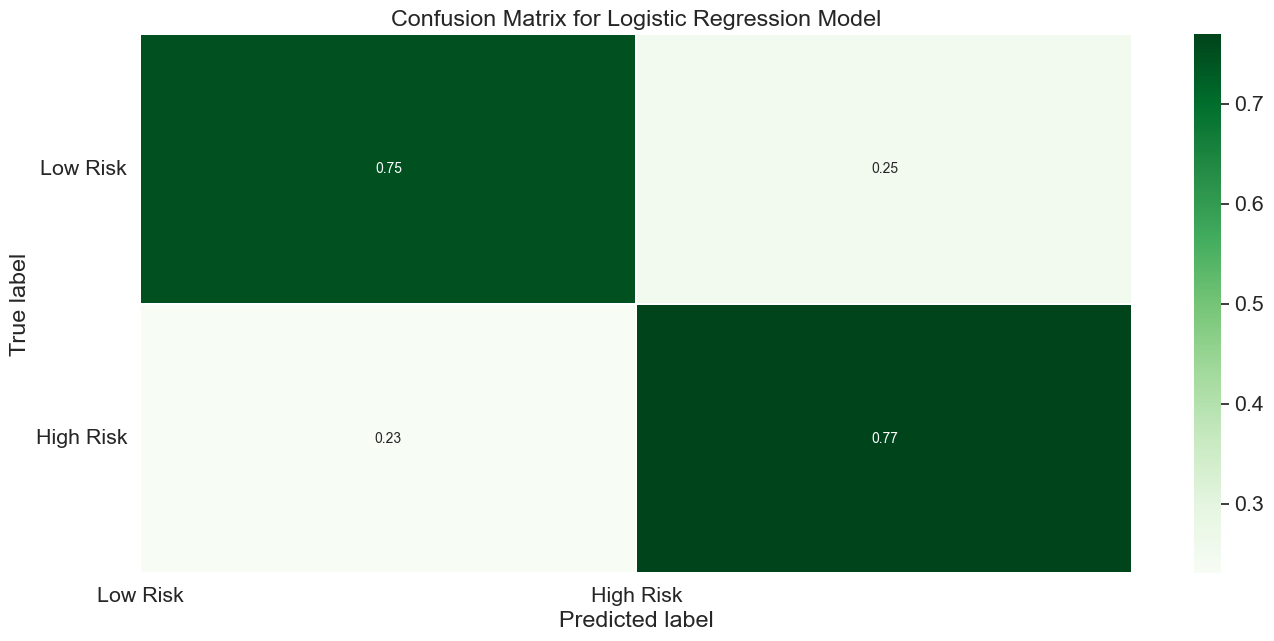

In [15]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_true, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Low Risk', 'High Risk']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

The Confusion Matrix shows that the Logistic Regression classifier struggled a bit more at predicting the Low Risk label, but overall predicted both labels quite well.

In [16]:
# Classification Report
target_names = ['low risk', 'high risk']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    low risk       0.76      0.75      0.76      2351
   high risk       0.76      0.77      0.76      2351

    accuracy                           0.76      4702
   macro avg       0.76      0.76      0.76      4702
weighted avg       0.76      0.76      0.76      4702



The classification report shows that precision is high, meaning that the model was careful to avoid labeling things “low risk” that aren’t low risk. On the other hand, recall is a bit lower for low risk, which means that the classifier is missing some 'low risks' because it is being too careful. Because precision and recall are both high, F1 is also high.

#### Random Forest Model - Scaled

In [17]:
# Train a Random Forest Classifier model on the scaled data and print the model score
clf_rf = RandomForestClassifier(random_state=42, n_estimators=500).fit(X_train_scaled, y_label_train)

print(f'Testing Score: {clf_rf.score(X_test_scaled, y_label_test)}')

Testing Score: 0.6456826882177796


In [18]:
# Confusion matrix for RF model
y_true1 = y_label_test
y_pred1 = clf_rf.predict(X_test_scaled)
confusion_matrix(y_true1, y_pred1)

array([[1944,  407],
       [1259, 1092]], dtype=int64)

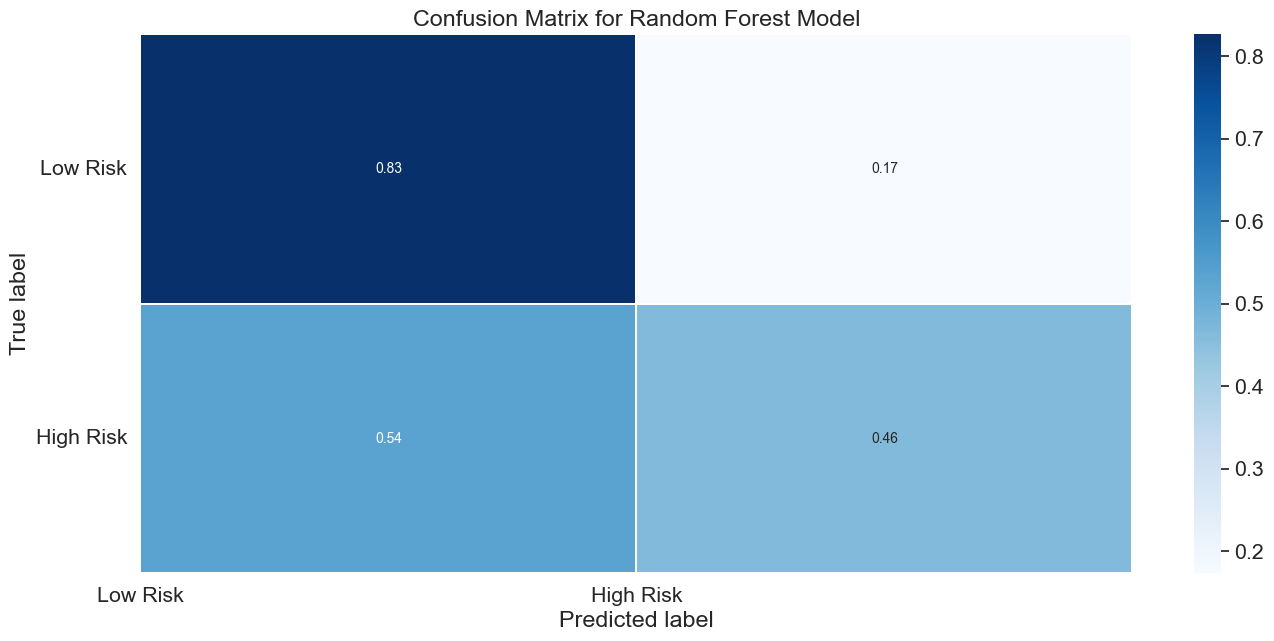

In [19]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_true1, y_pred1)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Blues, linewidths=0.2)

# Add labels to the plot
class_names = ['Low Risk', 'High Risk']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

The Confusion Matrix shows that the Random Forest classifier struggled at predicting the High Risk label.

In [20]:
# Classification Report for Random Forest model
print(classification_report(y_true1, y_pred1, target_names=target_names))

              precision    recall  f1-score   support

    low risk       0.61      0.83      0.70      2351
   high risk       0.73      0.46      0.57      2351

    accuracy                           0.65      4702
   macro avg       0.67      0.65      0.63      4702
weighted avg       0.67      0.65      0.63      4702



The classification report shows that precision is high for high risk, meaning that the model was careful to avoid labeling things “high risk” that aren’t low risk. On the other hand, recall is low for high risk, which means that the classifier is missing some 'high risks' because it is being too careful. The F1-score reflects the imbalance.

## Results - Scaled

**LR Scaled**: *Testing Score*: 0.7598894087622289 

**RF Scaled:** *Testing Score*: 0.6456826882177796

Overall, scaling greatly improved the score of the Logistic Regression model from .50 to .75 so that it outperformed the Random Forest model. This shows that sometimes a simple model with scaled data can be a better fit than one with more complexity. 